In [20]:
import numpy as np
import pandas as pd
import os


In [21]:
file_dir = "../DATA/oil_prices/"
file_list = os.listdir(file_dir)


In [22]:
oilDF = pd.DataFrame()
for file in file_list:
    df = pd.read_csv(file_dir + file)
    df.drop(["유종"], axis=1, inplace=True)
    df.replace("-", np.nan, inplace=True)
    oilDF = pd.concat([oilDF, df], join="outer", axis=0).reset_index(drop=True)
oilDF.columns
types = ["datetime64[ns]", "float64", "float64", "float64", "float64"]
oilDF = oilDF.astype(dict(zip(oilDF.columns, types))).rename(
    columns={oilDF.columns[0]: "date"}
)
oilDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7291 non-null   datetime64[ns]
 1   Dubai   7122 non-null   float64       
 2   Oman    7121 non-null   float64       
 3   Brent   6739 non-null   float64       
 4   WTI     6598 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 284.9 KB


In [23]:
oilDF["price"] = oilDF.mean(axis=1, skipna=True, numeric_only=True)
oilDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7291 non-null   datetime64[ns]
 1   Dubai   7122 non-null   float64       
 2   Oman    7121 non-null   float64       
 3   Brent   6739 non-null   float64       
 4   WTI     6598 non-null   float64       
 5   price   7291 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 341.9 KB


In [24]:
oil_priceDF = oilDF[["date", "price"]]
oil_priceDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7291 entries, 0 to 7290
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7291 non-null   datetime64[ns]
 1   price   7291 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 114.0 KB


In [25]:
start_date = oil_priceDF["date"].min()
end_date = oil_priceDF["date"].max()
full_date_range = pd.date_range(start=start_date, end=end_date)


In [26]:
oil_price_overDF = (
    oil_priceDF.set_index("date")
    .reindex(full_date_range)
    .reset_index()
    .rename(columns={"index": "date"})
)
oil_price_overDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10329 non-null  datetime64[ns]
 1   price   7291 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 161.5 KB


In [27]:
oil_price_overDF = oil_price_overDF.interpolate()
oil_price_overDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10329 non-null  datetime64[ns]
 1   price   10329 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 161.5 KB


In [28]:
oil_price_overDF["price"] = oil_price_overDF["price"].round(3)
oil_price_overDF


,date,price
0,1996-01-02,17.640
1,1996-01-03,17.650
2,1996-01-04,17.845
3,1996-01-05,18.120
4,1996-01-06,18.165
...,...,...
10324,2024-04-08,89.218
10325,2024-04-09,89.032
10326,2024-04-10,88.345
10327,2024-04-11,89.130


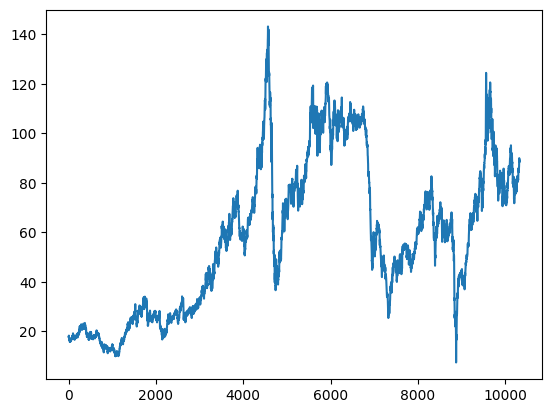

In [29]:
import matplotlib.pyplot as plt

plt.plot(oil_price_overDF["price"])


In [30]:
oil_price_overDF.to_csv("../DATA/oil_price.csv", index=False)
